In [1]:
import pandas as pd
df = pd.read_csv(r'C:\Users\Mallika Gadalay\Downloads\movie_data\movies.csv')
df1 = pd.read_csv(r'C:\Users\Mallika Gadalay\Downloads\movie_data\ratings.csv')
df.shape

(9742, 3)

Shape of "ratings.csv"

In [6]:
df1.shape

(100836, 4)

Unique "userId" available in "ratings.csv"

In [7]:
unique_user_ids = df1['userId'].nunique()

print(f'Number of unique userIds: {unique_user_ids}')

Number of unique userIds: 610


Maximum number of user ratings

In [8]:
ratings_df = pd.read_csv(r'C:\Users\Mallika Gadalay\Downloads\movie_data\movies.csv')
movies_df = pd.read_csv(r'C:\Users\Mallika Gadalay\Downloads\movie_data\ratings.csv')

merged_df = pd.merge(ratings_df, movies_df, on='movieId')

rating_counts = merged_df.groupby('title')['rating'].count().reset_index()

rating_counts = rating_counts.sort_values(by='rating', ascending=False)

print(rating_counts.head(1))

                    title  rating
3158  Forrest Gump (1994)     329


Correct tags submitted by users to "Matrix, The (1999)" movie

In [9]:

ratings_df = pd.read_csv(r'C:\Users\Mallika Gadalay\Downloads\movie_data\ratings.csv')
movies_df = pd.read_csv(r'C:\Users\Mallika Gadalay\Downloads\movie_data\movies.csv')
tags_df = pd.read_csv(r'C:\Users\Mallika Gadalay\Downloads\movie_data\tags.csv')  # assuming tags are in a separate file


merged_df = pd.merge(ratings_df, movies_df, on='movieId')


matrix_df = merged_df[merged_df['title'] == 'Matrix, The (1999)']

matrix_tags_df = pd.merge(matrix_df, tags_df, on='movieId')

unique_tags = matrix_tags_df['tag'].unique()

print(unique_tags)

['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


Average user rating for movie named "Terminator 2: Judgment Day (1991)

In [10]:

merged_df = pd.merge(ratings_df, movies_df, on='movieId')

terminator_df = merged_df[merged_df['title'] == 'Terminator 2: Judgment Day (1991)']

average_rating = terminator_df['rating'].mean()

print("Average user rating for 'Terminator 2: Judgment Day (1991)':", average_rating)

Average user rating for 'Terminator 2: Judgment Day (1991)': 3.970982142857143


Data distribution of user ratings for "Fight Club (1999)" movie

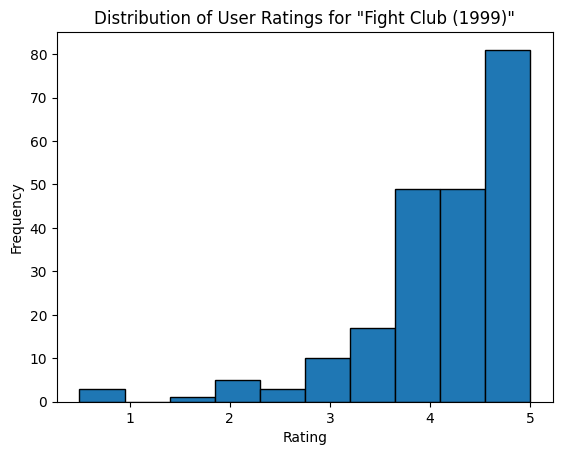

In [11]:

import matplotlib.pyplot as plt

merged_df = pd.merge(ratings_df, movies_df, on='movieId')

fight_club_df = merged_df[merged_df['title'] == 'Fight Club (1999)']

plt.hist(fight_club_df['rating'], bins=10, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.show()

In [12]:

grouped_ratings_df = ratings_df.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()
grouped_ratings_df.columns = ['movieId', 'rating_count', 'rating_mean']


merged_df = pd.merge(movies_df, grouped_ratings_df, on='movieId', how='inner')

filtered_df = merged_df[merged_df['rating_count'] > 50]

print(filtered_df.head())

   movieId                    title  \
0        1         Toy Story (1995)   
1        2           Jumanji (1995)   
2        3  Grumpier Old Men (1995)   
5        6              Heat (1995)   
6        7           Sabrina (1995)   

                                        genres  rating_count  rating_mean  
0  Adventure|Animation|Children|Comedy|Fantasy           215     3.920930  
1                   Adventure|Children|Fantasy           110     3.431818  
2                               Comedy|Romance            52     3.259615  
5                        Action|Crime|Thriller           102     3.946078  
6                               Comedy|Romance            54     3.185185  


Most popular based on  average user ratings

In [13]:

sorted_df = filtered_df.sort_values(by='rating_mean', ascending=False)

most_popular_movie = sorted_df.iloc[0]

print("The most popular movie is:", most_popular_movie['title'])

The most popular movie is: Shawshank Redemption, The (1994)


Top 5 popular movies based on number of user ratings.

In [14]:
sorted_df = filtered_df.sort_values(by='rating_count', ascending=False)

top_5_movies = sorted_df.head(5)

print("The top 5 popular movies based on number of user ratings are:")
print(top_5_movies['title'])

The top 5 popular movies based on number of user ratings are:
314                  Forrest Gump (1994)
277     Shawshank Redemption, The (1994)
257                  Pulp Fiction (1994)
510     Silence of the Lambs, The (1991)
1938                  Matrix, The (1999)
Name: title, dtype: object


"Third most popular" based on the number of user ratings

In [15]:
sci_fi_movies = filtered_df[filtered_df['genres'].str.contains('Sci-Fi')]

sorted_sci_fi_movies = sci_fi_movies.sort_values(by='rating_count', ascending=False)


third_most_popular_sci_fi_movie = sorted_sci_fi_movies.iloc[2]

print("The third most popular Sci-Fi movie is:", third_most_popular_sci_fi_movie['title'])

The third most popular Sci-Fi movie is: Jurassic Park (1993)


MovieId of the movie which has the highest IMDB rating

In [16]:
links_data = pd.read_csv(r'C:\Users\Mallika Gadalay\Downloads\movie_data\links.csv')

filtered_data_with_imdb = pd.merge(filtered_df, links_data[['movieId', 'imdbId']], on='movieId', how='left')

# Display the resulting dataset with the new 'imdbId' column
filtered_data_with_imdb.head()

,movieId,title,genres,rating_count,rating_mean,imdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319


In [17]:
import requests
import numpy as np
from bs4 import BeautifulSoup  
def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)  
    soup = BeautifulSoup(response.text, 'html.parser')  
    imdb_rating = soup.find('span', {'itemprop': 'ratingValue'})  
    return imdb_rating.text if imdb_rating else np.nan

In [ ]:
filtered_data_with_imdb['imdb_rating'] = filtered_data_with_imdb['imdbId'].apply(scrapper)
max_rating_row = filtered_data_with_imdb.loc[filtered_data_with_imdb['imdb_rating'].idxmax()]
movieId_with_highest_rating = max_rating_row['movieId']

print("The movieId of the movie with the highest IMDB rating is:", movieId_with_highest_rating)

MovieId of the "Sci-Fi" movie which has the highest IMDB rating

In [ ]:

# Filtering the DataFrame for Sci-Fi genre
sci_fi_movies = imdb_data_filtered[imdb_data_filtered['Genre'].str.contains('Sci-Fi', case=False)]

# Finding the highest-rated Sci-Fi movie
highest_rated_sci_fi_movie = sci_fi_movies.loc[sci_fi_movies['IMDB_Rating'].idxmax()]
highest_rated_sci_fi_movie_title = highest_rated_sci_fi_movie['Series_Title']

print("Highest-rated Sci-Fi movie:")
print(highest_rated_sci_fi_movie_title)

movie_id_inception = filtered_data_with_imdb.loc[filtered_data_with_imdb['title'] == 'Inception (2010)', 'movieId'].values[0]

print(f"The 'movieId' of 'Inception' is: ",{movie_id_inception})